<a href="https://colab.research.google.com/github/srivastavask/cvlab-ai/blob/main/lab5/B40_E22CSEU1183_SANCHIT/LAB_6/Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

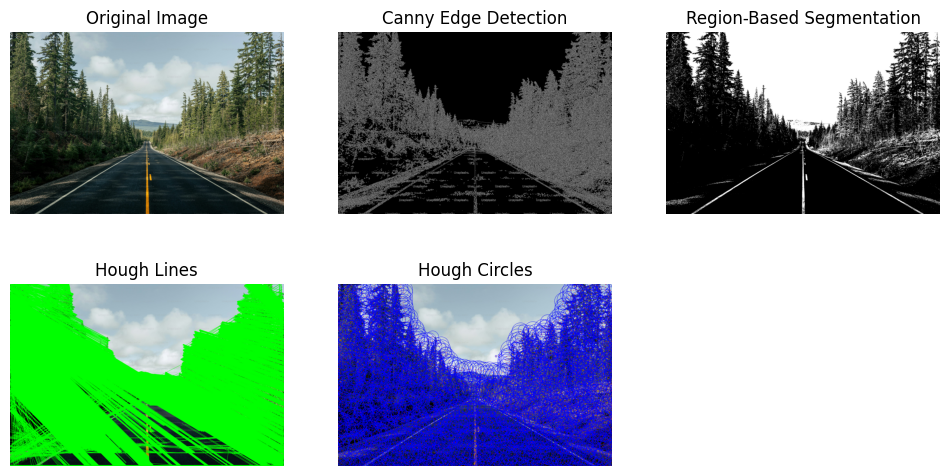

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = "/content/road.jpeg"
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 1. Edge-Based Segmentation using Canny Edge Detection
edges = cv2.Canny(gray, 50, 150)

# 2. Region-Based Segmentation using Thresholding
_, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

# 3. Hough Transform for Line Detection
lines = cv2.HoughLinesP(edges, 1, np.pi/180, 68, minLineLength=15, maxLineGap=250)
line_image = np.copy(image)
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(line_image, (x1, y1), (x2, y2), (0, 255, 0), 2)

# 4. Hough Transform for Circle Detection
circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1.2, 30, param1=50, param2=30, minRadius=10, maxRadius=100)
circle_image = np.copy(image)
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        cv2.circle(circle_image, (i[0], i[1]), i[2], (255, 0, 0), 2)  # Circle outline
        cv2.circle(circle_image, (i[0], i[1]), 2, (0, 0, 255), 3)     # Center

# Display Results
titles = ['Original Image', 'Canny Edge Detection', 'Region-Based Segmentation', 'Hough Lines', 'Hough Circles']
images = [image, edges, thresh, line_image, circle_image]

plt.figure(figsize=(12, 6))
for i in range(5):
    plt.subplot(2, 3, i+1)
    if i == 1 or i == 2:
        plt.imshow(images[i], cmap='gray')
    else:
        plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.axis('off')

plt.show()


0: 448x640 1 person, 1 bicycle, 6 cars, 2 trucks, 161.1ms
Speed: 5.0ms preprocess, 161.1ms inference, 2.4ms postprocess per image at shape (1, 3, 448, 640)


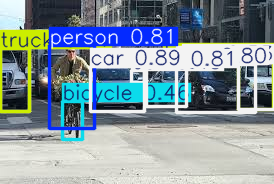

In [8]:
from ultralytics import YOLO

# Load the YOLO model (change 'yolov8n.pt' to other variants like 'yolov8m.pt' for better accuracy)
model = YOLO('yolov8n.pt')  # YOLOv8 nano (lightweight version)

# Load the image
image_path = "/content/YOLO.jpeg"
image = cv2.imread(image_path)

# Perform object detection
results = model(image)

# Plot the detected objects
for result in results:
    result.show()  # Shows the image with bounding boxes

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# Load Fashion MNIST dataset
fashion_mnist = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalize the images
x_train = x_train / 255.0
x_test = x_test / 255.0

# Expand dimensions to match the expected input shape of CNNs
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# Define a simple CNN model
model = keras.models.Sequential([
    keras.layers.Input(shape=(28, 28, 1)),
    keras.layers.Conv2D(32, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')  # Classification output
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.7701 - loss: 0.6378 - val_accuracy: 0.8791 - val_loss: 0.3429
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8825 - loss: 0.3199 - val_accuracy: 0.8933 - val_loss: 0.3016
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9007 - loss: 0.2683 - val_accuracy: 0.8927 - val_loss: 0.2851
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9167 - loss: 0.2270 - val_accuracy: 0.9027 - val_loss: 0.2661
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9252 - loss: 0.1991 - val_accuracy: 0.9077 - val_loss: 0.2568
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9357 - loss: 0.1745 - val_accuracy: 0.9118 - val_loss: 0.2504
Epoch 7/10
1875/1875 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


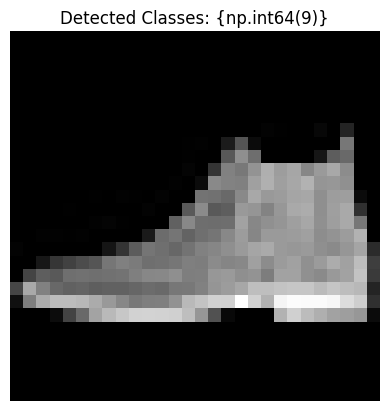

In [3]:
# Function to divide image into regions
def extract_regions(img, region_size=(28, 28)):
    regions = []
    step_size = region_size[0] // 2  # Overlapping regions
    for x in range(0, img.shape[0] - region_size[0] + 1, step_size):
        for y in range(0, img.shape[1] - region_size[1] + 1, step_size):
            region = img[x:x+region_size[0], y:y+region_size[1]]
            regions.append(region)
    return np.array(regions)

# Process a test image
test_img = x_test[0]  # Choose an image
regions = extract_regions(test_img)

# Classify each region
region_classes = []
for region in regions:
    region = np.expand_dims(region, axis=[0, -1])  # Add batch & channel dims
    pred = np.argmax(model.predict(region))
    region_classes.append(pred)

# Combine results and visualize
plt.imshow(test_img[..., 0], cmap="gray")
plt.title(f"Detected Classes: {set(region_classes)}")
plt.axis("off")
plt.show()